# Autoencoder

In [1]:
from conx import *
import random

Using Theano backend.


In [2]:
net = Network("Autoencoder", arrow_color="red", arrow_width=2, border_color="blue", border_width=3)
net.add(Layer("input", 10, minmax=(0,1)))
net.add(Layer("hidden", 5, activation="relu", visible=True))
net.add(Layer("output", 10, activation="sigmoid"))
net.config["font_family"] = "monospace"

In [3]:
net.connect()

In [4]:
net.compile(loss='binary_crossentropy', optimizer="adam")

<IPython.core.display.Javascript object>

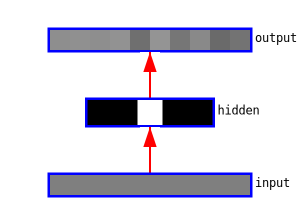

In [5]:
net

In [6]:
net["hidden"].visible = False

In [7]:
patterns = [one_hot(i, 10) for i in range(10)]

In [8]:
patterns[0]

[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [9]:
dataset = [(p,p) for p in patterns]

In [10]:
import time
for i in range(10):
    net.propagate(dataset[i][0])
    time.sleep(1)

In [11]:
dataset[0]

([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

In [12]:
net.set_dataset(dataset)

10 train inputs, 0 test inputs
Set 10 inputs and targets
Input data shape: (10,), range: (0.0, 1.0), type: float32
Target data shape: (10,), range: (0.0, 1.0), type: float32


In [13]:
net.train(accuracy=1, epochs=10000, report_rate=200, tolerance=0.4)

Training...
Epoch #  200 | train loss 0.52925 | train acc 0.90000 | validate% 0.00000
Epoch #  400 | train loss 0.33666 | train acc 0.90000 | validate% 0.00000
Epoch #  600 | train loss 0.26295 | train acc 0.91000 | validate% 0.10000
Epoch #  800 | train loss 0.21127 | train acc 0.92000 | validate% 0.10000
Epoch # 1000 | train loss 0.16883 | train acc 0.93000 | validate% 0.30000
Epoch # 1200 | train loss 0.13417 | train acc 0.96000 | validate% 0.30000
Epoch # 1400 | train loss 0.10659 | train acc 0.97000 | validate% 0.60000
Epoch # 1600 | train loss 0.08198 | train acc 0.97000 | validate% 0.70000
Epoch # 1800 | train loss 0.06032 | train acc 1.00000 | validate% 0.90000
Epoch # 1916 | train loss 0.04988 | train acc 1.00000 | validate% 1.00000


In [14]:
net.propagate(dataset[0][0])

[0.88720727,
 0.00025744713,
 0.049273584,
 0.00048073832,
 0.0034091093,
 0.018396527,
 0.00067062909,
 0.053740155,
 0.017888974,
 0.0001633966]

In [15]:
net.test()

Testing...
# | inputs | outputs
0 | [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] | [0.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0]
1 | [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] | [0.0, 0.9, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0]
2 | [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] | [0.0, 0.0, 0.8, 0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0]
3 | [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0] | [0.0, 0.1, 0.0, 0.7, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1]
4 | [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0] | [0.0, 0.1, 0.0, 0.0, 0.6, 0.0, 0.0, 0.0, 0.1, 0.0]
5 | [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0] | [0.0, 0.0, 0.1, 0.0, 0.0, 0.9, 0.0, 0.1, 0.0, 0.1]
6 | [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0] | [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9, 0.0, 0.0, 0.0]
7 | [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0] | [0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.8, 0.0, 0.0]
8 | [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0] | [0.0, 0.0, 0.1, 0.0, 0.1, 0.0, 0.0, 0.0, 0.8, 0

In [23]:
net.reset()

In [18]:
from keras.datasets import mnist
(train_inputs, train_targets), (test_inputs, test_targets) = mnist.load_data()

In [19]:
train_inputs[0].shape

(28, 28)

In [20]:
28 * 28

784

In [21]:
net = Network("MNIST-Autoencoder")
net.add(Layer("input", 784, vshape=(28,28), minmax=(0,255)))
net.add(Layer("hidden1", 25, vshape=(5,5), activation="relu"))
net.add(Layer("hidden2", 25, vshape=(5,5), activation="relu"))
net.add(Layer("hidden3", 25, vshape=(5,5), activation="relu"))
net.add(Layer("output", 784, vshape=(28,28), activation="sigmoid"))

In [22]:
net.connect()
net.compile(loss="binary_crossentropy", optimizer="adam")

<IPython.core.display.Javascript object>

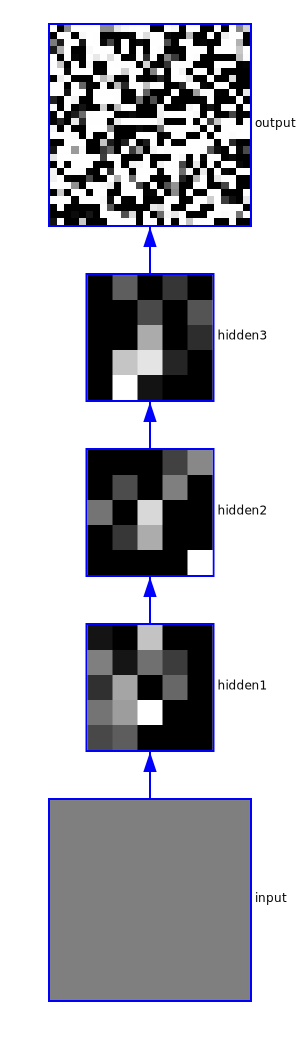

In [23]:
net

<IPython.core.display.Javascript object>

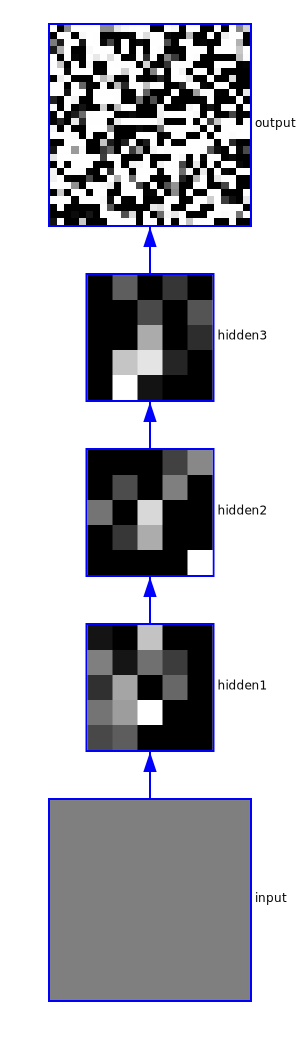

In [24]:
net

In [25]:
output = net.propagate(train_inputs[random.randint(0,1000)].reshape((784, )))

In [24]:
train_inputs = np.array([pattern.reshape((784,)) for pattern in train_inputs])

In [25]:
net.set_dataset_direct(train_inputs, train_inputs)

60000 train inputs, 0 test inputs
Set 60000 inputs and targets
Input data shape: (784,), range: (0, 255), type: uint8
Target data shape: (784,), range: (0, 255), type: uint8


In [26]:
net.split_dataset(0.10)

Split dataset into:
   6000 train inputs
   54000 test inputs


In [28]:
net.train(accuracy=0.5, epochs=1000, report_rate=1)

Training...
Epoch #   23 | train loss -462.59628 | train acc 0.32373 | validate% 0.00000
Epoch #   24 | train loss -468.51141 | train acc 0.32581 | validate% 0.00000
Epoch #   25 | train loss -473.51440 | train acc 0.32803 | validate% 0.00000
Epoch #   26 | train loss -476.82687 | train acc 0.32996 | validate% 0.00000
Epoch #   27 | train loss -478.63983 | train acc 0.33102 | validate% 0.00000
Epoch #   28 | train loss -479.63916 | train acc 0.33213 | validate% 0.00000
Epoch #   29 | train loss -480.15137 | train acc 0.33374 | validate% 0.00000
Epoch #   30 | train loss -480.40634 | train acc 0.33506 | validate% 0.00000
Epoch #   31 | train loss -480.59192 | train acc 0.33625 | validate% 0.00000
Epoch #   32 | train loss -480.87784 | train acc 0.33768 | validate% 0.00000
Epoch #   33 | train loss -481.41568 | train acc 0.33916 | validate% 0.00000
Epoch #   34 | train loss -482.26779 | train acc 0.34016 | validate% 0.00000
Epoch #   35 | train loss -483.18649 | train acc 0.34037 | valid

KeyboardInterrupt: 

In [29]:
import time
for i in range(20):
    net.propagate(net.get_input(i))
    time.sleep(1)